In [1]:
! pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.7 MB/s eta 0:00:00


In [30]:
# Delivering Personalized Movie Recommendations with an AI-driven Matchmaking System

# Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
import gradio as gr

In [31]:
# Step 2: Load the Dataset
movies_df = pd.read_csv("https://github.com/Thamizhselvans-tech/Movie-recommendations-with-Ai-matchmaking-system/raw/main/Movies%20Recommendation.csv")

In [32]:
movies_df.head()

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [33]:
# Step 3: Initial Data Exploration
print("\nShape:", movies_df.shape)


Shape: (4760, 21)


In [34]:
print("Info:\n")
print(movies_df.info())

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  M

In [35]:
print("\nMissing Values:\n")
movies_df.isnull().sum()


Missing Values:



,0
Movie_ID,0
Movie_Title,0
Movie_Genre,0
Movie_Language,0
Movie_Budget,0
Movie_Popularity,0
Movie_Release_Date,0
Movie_Revenue,0
Movie_Runtime,2
Movie_Vote,0


In [36]:
print("Duplicates: ", movies_df.duplicated().sum())

Duplicates:  0


In [37]:
# Step 4: Drop duplicates and handle missing values
movies_df.drop_duplicates(inplace=True)
movies_df.dropna(inplace=True)

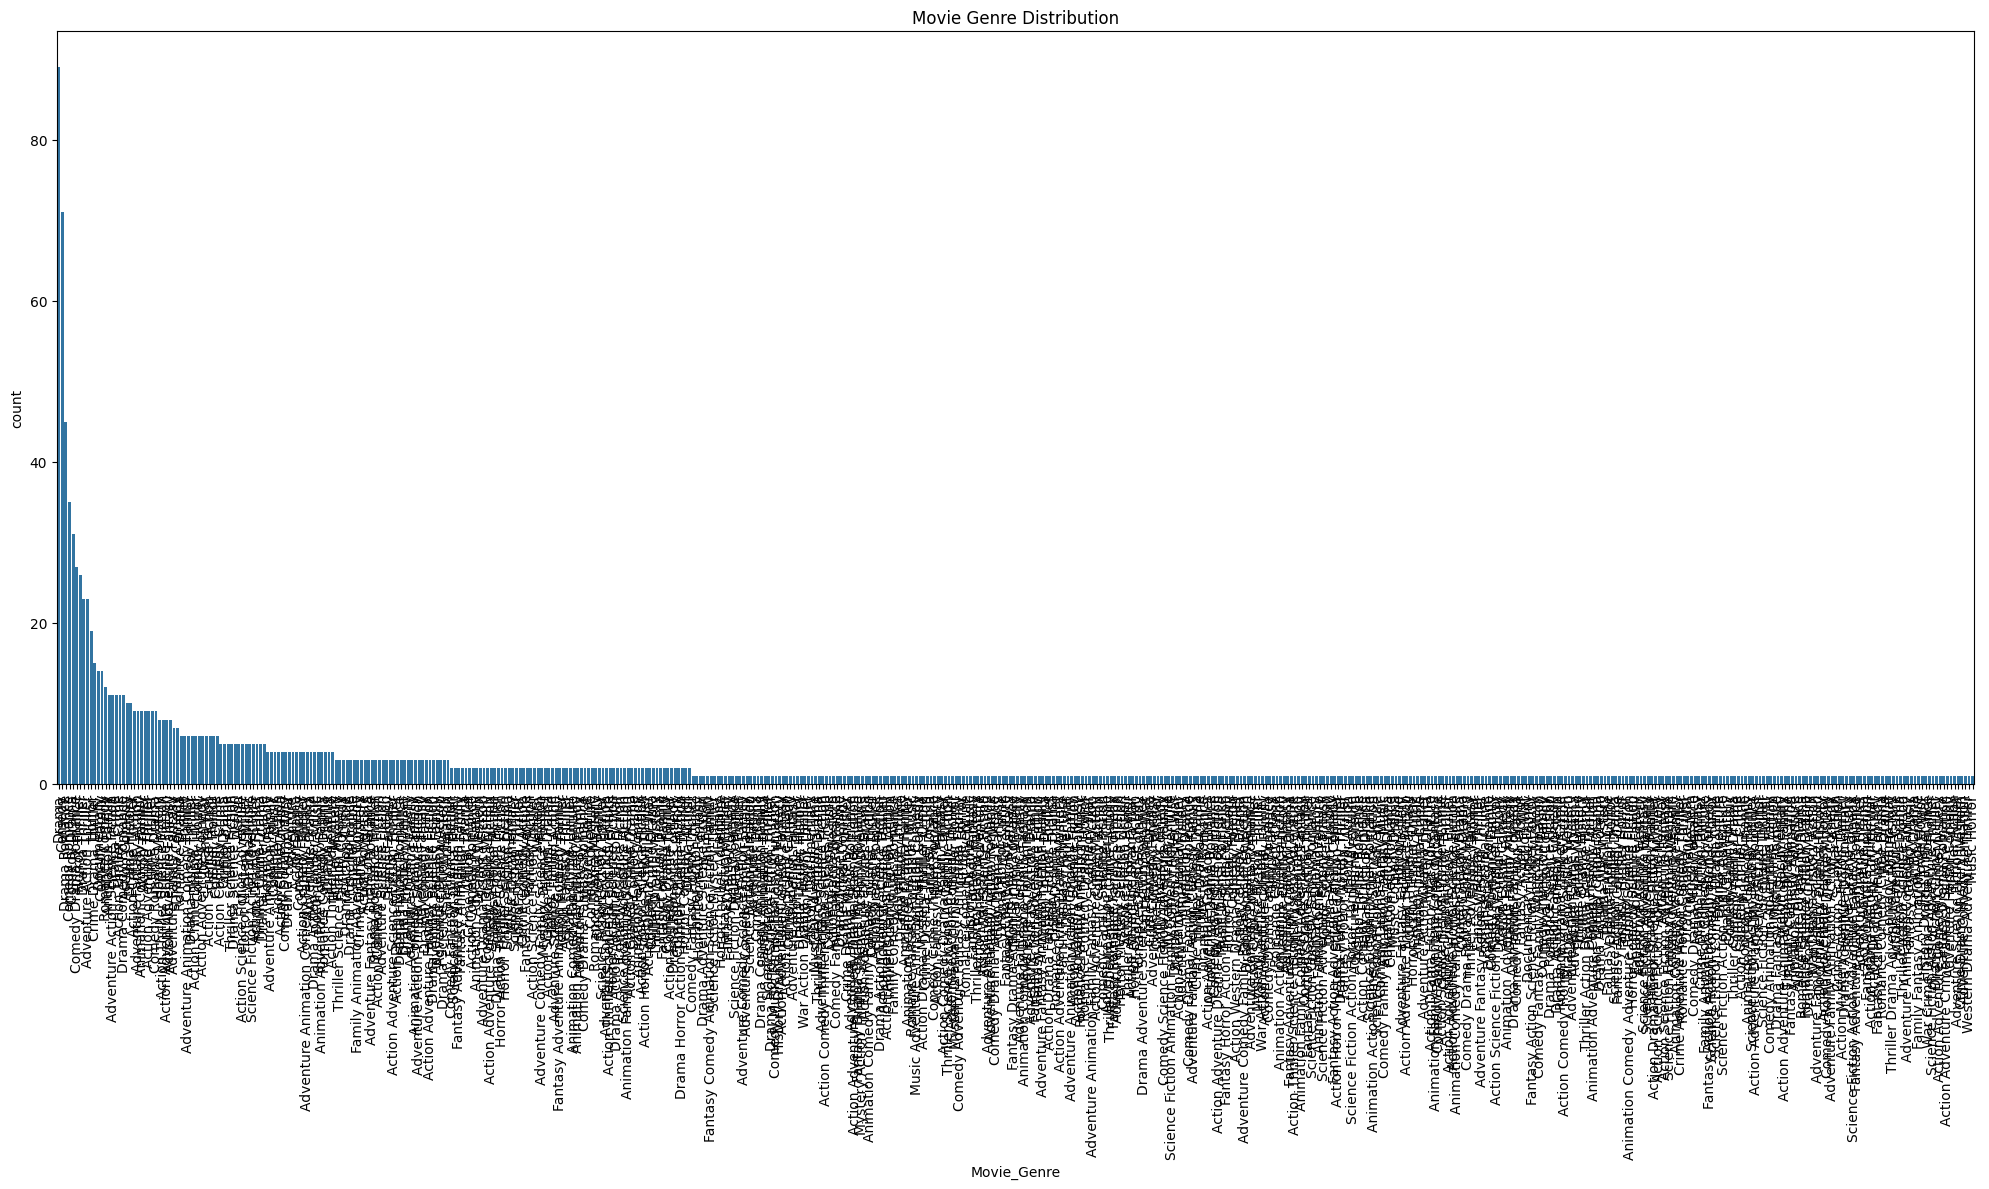

In [38]:
# Step 5: Exploratory Data Analysis
plt.figure(figsize=(20,12))
sns.countplot(data=movies_df, x="Movie_Genre", order=movies_df['Movie_Genre'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Movie Genre Distribution")
plt.tight_layout()
plt.show()

In [39]:
# Step 6: Feature Engineering - Encode Categorical Data
categorical_cols = ["Movie_Genre", "Movie_Director", "Movie_Cast"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    movies_df[col] = le.fit_transform(movies_df[col])
    label_encoders[col] = le

In [40]:
# Step 7: Normalize the Features
scaler = StandardScaler()
feature_cols = ["Movie_Genre", "Movie_Director", "Movie_Cast", "Movie_Vote"]
features = scaler.fit_transform(movies_df[feature_cols])

In [41]:
# Step 8: Build Recommendation System using Cosine Similarity
cos_sim_matrix = cosine_similarity(features)

In [42]:
# Function to get movie recommendations
def get_recommendations(movie_title, top_n=5):
    if movie_title not in movies_df['Movie_Title'].values:
        return f"Movie '{movie_title}' not found."
    idx = movies_df[movies_df['Movie_Title'] == movie_title].index[0]
    similarity_scores = list(enumerate(cos_sim_matrix[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    movie_indices = [i[0] for i in similarity_scores]
    return movies_df['Movie_Title'].iloc[movie_indices].tolist()

In [43]:
# Step 9: Gradio Interface
def recommend_movies(title):
    return get_recommendations(title)

In [44]:
movie_list = movies_df['Movie_Title'].unique().tolist()
grad_interface = gr.Interface(
    fn=recommend_movies,
    inputs=gr.Dropdown(choices=movie_list, label="Select a Movie"),
    outputs=gr.Textbox(label="Recommended Movies"),
    title="🎬 AI Movie Recommender",
    description="Select a movie to get personalized recommendations based on content similarity.",
)


In [45]:
# Step 10: Launch App
grad_interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://06feba3d0abf251a8a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
